---
### Initial Data Loading and Exploration

In this section, we'll be setting up our environment and loading our dataset. The steps involved are:

1. **Importing Libraries**: We start by importing all the necessary libraries and modules required for our analysis and modeling.
2. **Dataset Description**: 
    - **Red Dwarf**: Represented by 0
    - **Brown Dwarf**: Represented by 1
    - **White Dwarf**: Represented by 2
    - **Main Sequence**: Represented by 3
    - **Super Giants**: Represented by 4
    - **Hyper Giants**: Represented by 5

    The dataset contains various features like Temperature (in K), Luminosity (L/Lo), Radius (R/Ro), Absolute Magnitude (Mv), Color of the spectrum, and Spectral Class (O,B,A,F,G,K,M). More details on the Spectral Class can be found [here](https://en.wikipedia.org/wiki/Asteroid_spectral_types).

3. **Loading the Dataset**: We load our dataset from the CSV file and keep an original copy for reference.
4. **Data Cleaning**: Any rows with missing values are removed to ensure the quality of our dataset.

---

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler
import pickle

"""
Red Dwarf - 0
Brown Dwarf - 1
White Dwarf - 2
Main Sequence - 3
Super Giants - 4
Hyper Giants - 5

Temperature -- K
L -- L/Lo
R -- R/Ro
AM -- Mv
Color -- General Color of Spectrum
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants
"""

# Read the CSV file
stars = pd.read_csv("data/Stars.csv")
stars_original = pd.read_csv("data/Stars.csv")

# Remove any Empty Rows
stars = stars.dropna()

stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


---
### Data Preprocessing: Encoding and Cleaning

In this section, we focus on preparing our dataset for machine learning models. The steps involved are:

1. **Mapping Types**: We map the types of stars to their respective numeric codes. This ensures that our model can understand the data.
2. **Cleaning Color Names**: We merge similar color names and convert them to lowercase for consistency.
3. **Encoding Colors**: Each color is then mapped to a unique numeric code. This encoding process helps our model to process the data efficiently.
4. **Encoding Spectral Classes**: Similarly, the spectral classes of stars are encoded to numeric values. This is crucial as machine learning models work best with numeric data.

After these preprocessing steps, our dataset is ready for further analysis and model training.

---

In [135]:
d = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5} # not really necessary
stars['Type'] = stars['Type'].map(d)

# Merge similar color names
stars['Color'] = stars['Color'].str.lower()  # Convert to lowercase to ensure consistency
stars['Color'] = stars['Color'].replace({
    'blue white': 'blue-white',
    'yellow-white': 'white-yellow',
    'yellowish white': 'yellowish'
})

# Encode the colors
color = {
    'red': 0, 
    'blue-white': 1, 
    'white': 2, 
    'blue': 3, 
    'yellowish': 4, 
    'pale yellow orange': 5, 
    'whitish': 6, 
    'white-yellow': 7, 
    'orange': 8, 
    'orange-red': 9
}
stars['Color'] = stars['Color'].map(color)

# Define the encoding dictionary for Spectral_Class
spectral_class = {
    'O': 0,
    'B': 1,
    'A': 2,
    'F': 3,
    'G': 4,
    'K': 5,
    'M': 6
}

# Encode the Spectral_Class column
stars['Spectral_Class'] = stars['Spectral_Class'].map(spectral_class)

stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,0,6,0
1,3042,0.000500,0.1542,16.60,0,6,0
2,2600,0.000300,0.1020,18.70,0,6,0
3,2800,0.000200,0.1600,16.65,0,6,0
4,1939,0.000138,0.1030,20.06,0,6,0


---
### Creating the Decision Tree and Feature Scaling:

In this section, we'll be preparing our data for the Decision Tree model. The steps involved are:

1. **Feature Selection**: We select the relevant features for our model. These features include 'Temperature', 'L', 'R', 'A_M', 'Color', and 'Spectral_Class'.
2. **Data Splitting**: We split our dataset into a training set and a test set. This is essential for training our model and then evaluating its performance.

3. **Feature Scaling**: Even though Decision Trees aren't particularly sensitive to the magnitude of features, it's a good practice to scale our features, especially if we plan to use other algorithms in the future. However in this case it doesnt improve our model. You can apply it by removing the comment and changing the x parameter in the dtree.fit method to X_train_scaled.

4. **Model Training**: Finally, we train our Decision Tree model using the scaled training data.
5. **Plotting The Model**: Now we can visualize our model by using matplotlib to plot the decision tree.
---



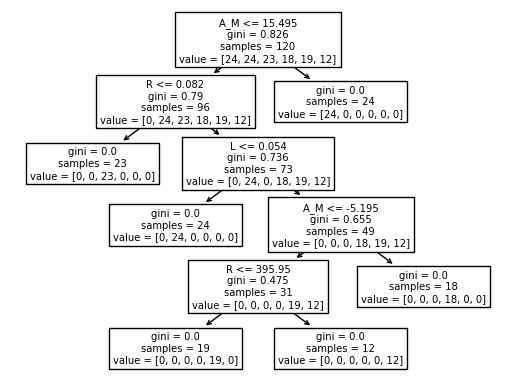

In [152]:
features = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

X = stars[features]
y = stars['Type']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1) # 50% training and 50% test

""" YOU CAN APPLY FEATURE SCALING HERE. BUT IT HURTS THE ACCURACY 
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)"""

# Train the decision tree on the scaled data
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

tree.plot_tree(dtree, feature_names=features)
# Save the figure to a file
plt.savefig('stars_plot.png', dpi=300, format='png')

---
### Making Predictions with the Trained Model

Now that we have a trained Decision Tree model, we can use it to make predictions. In this section:

1. **Sample Prediction**: We'll predict the type of a star given a sample set of features. The features for this sample are:
    - **Temperature**: 3600 K
    - **Luminosity (L/Lo)**: 0.0029
    - **Radius (R/Ro)**: 0.51
    - **Absolute Magnitude (Mv)**: 10.69
    - **Color**: Encoded as 0 (which corresponds to 'red')
    - **Spectral Class**: Encoded as 6 (which corresponds to 'M')

Let's see what our model predicts for this sample!

---

In [153]:
print(dtree.predict([[3600,0.0029,0.51,10.69,0,6]]))

[1]


C:\Users\kaspe\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [154]:
#Predict the response for test dataset
y_pred = dtree.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [126]:
pickle.dump(dtree , open('star_model' , 'wb')) #

---
### Cross-Validation and Model Evaluation

In this section, we'll be assessing the performance of our trained Decision Tree model using K-fold cross-validation. The steps involved are:

1. **Cross-Validation Function**: We define a function `cross_validation` that performs K-fold cross-validation on the provided model and dataset. This function returns various metrics such as accuracy, precision, recall, and F1 score for both training and validation sets.
2. **Visualization Function**: The `plot_result` function is defined to visualize the training and validation results across different folds. This helps in understanding the model's consistency and performance across different subsets of the data.
3. **Model Evaluation**: We then call the `cross_validation` function with our trained Decision Tree model and the dataset to get the evaluation metrics.
4. **Performance Visualization**: Using the `plot_result` function, we visualize the accuracy of the model across different folds of the cross-validation.

---

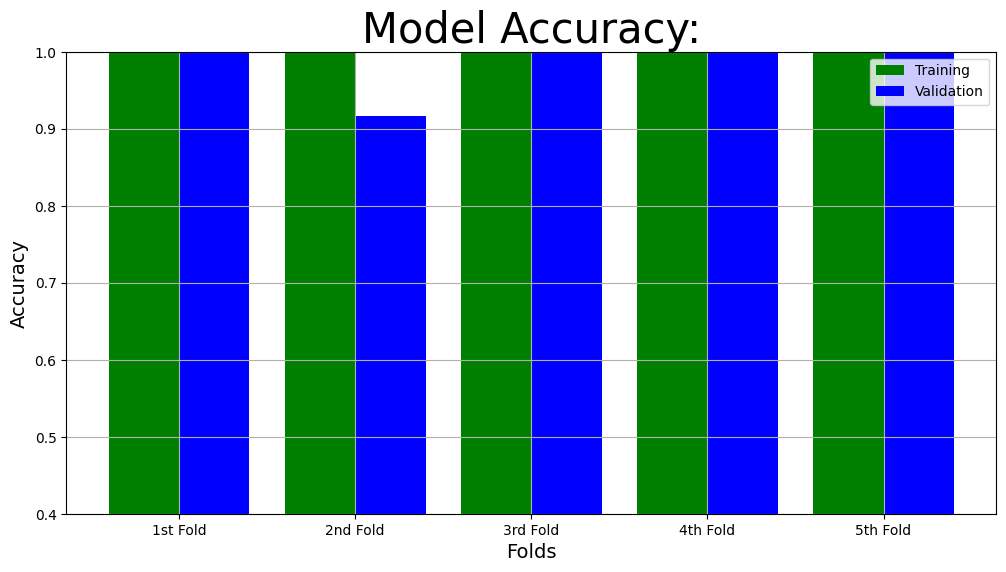

In [156]:
def cross_validation(model, _X, _y, _cv):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = {
          'accuracy': 'accuracy',
          'precision': 'precision_weighted',
          'recall': 'recall_weighted',
          'f1': 'f1_weighted'
          }

      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='green', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='blue', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

results = cross_validation(dtree, X, y, 5)  # Assuming 5-fold cross-validation

# Plotting training and validation accuracy
plot_result(
    x_label="Folds",
    y_label="Accuracy",
    plot_title="Model Accuracy:",
    train_data=results["Training Accuracy scores"],
    val_data=results["Validation Accuracy scores"]
)
